<a href="https://colab.research.google.com/github/Shravani-std/Deep-Learning/blob/main/functional_api_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example_1

In [ ]:
from keras.models import Model

In [ ]:
model = Model(x, outputs=[output_1, output_2])

In [ ]:
from keras.layers import *

In [ ]:
x = Input(shape=(3,))

In [ ]:
hidden_1 = Dense(128, activation='relu')(x)
hidden_2 = Dense(64, activation='relu')(hidden_1)

output_1 = Dense(1, activation='linear')(hidden_2)
output_2 = Dense(1, activation= 'sigmoid')(hidden_2)

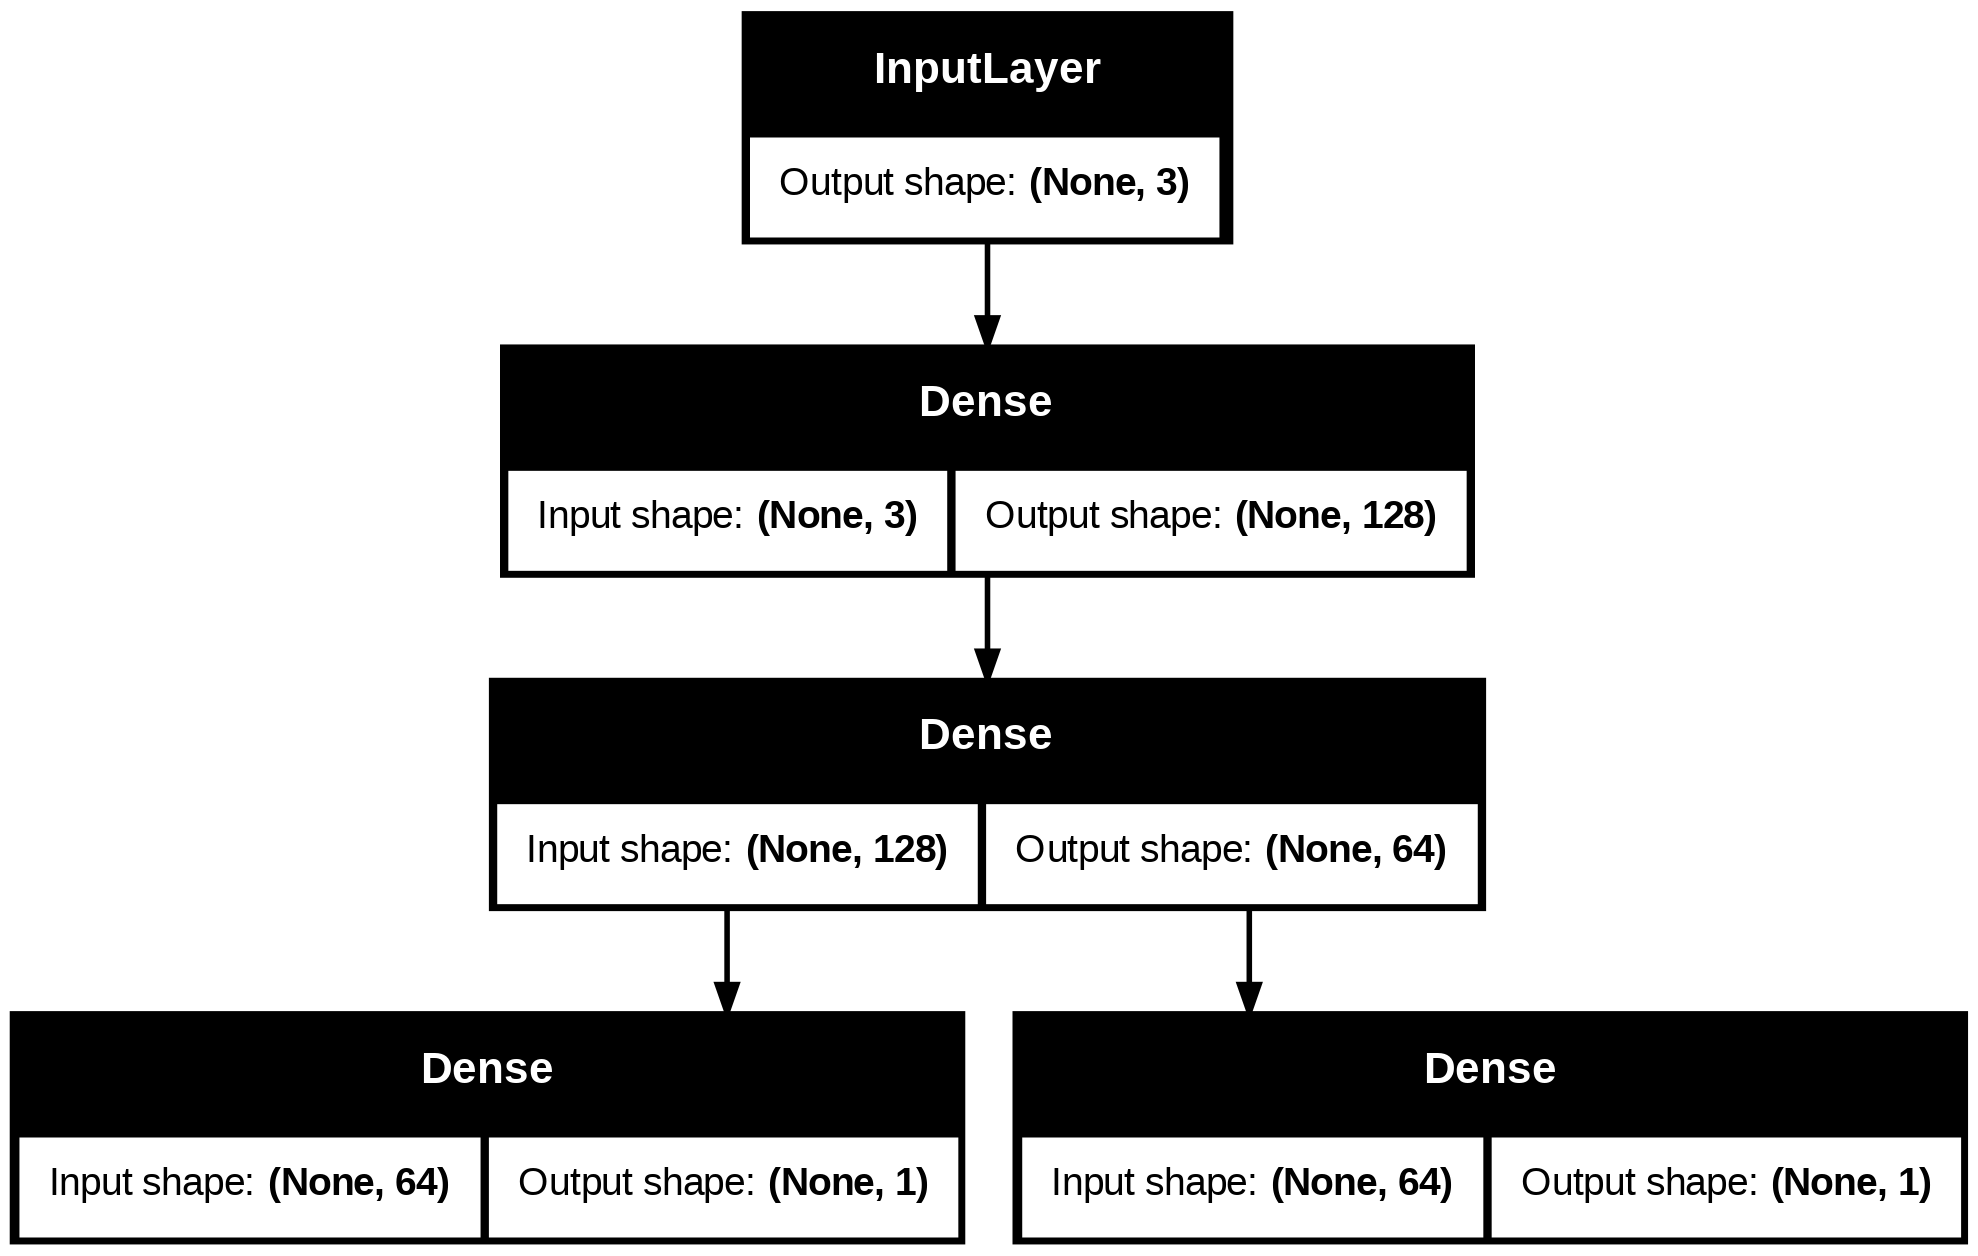

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

# Example_2


In [ ]:
from keras.layers import *
from keras.models import Model


In [ ]:
input_1 = Input(shape=(128,))
input_2 = Input(shape=(32,))

In [ ]:
x = Dense( 8 , activation= 'relu')(input_1)
x1 = Dense( 4, activation= 'relu')(x)

In [ ]:
y = Dense( 64, activation= 'relu')(input_2)
y1 = Dense( 32, activation= 'relu')(y)
y2 = Dense( 16 , activation='relu')(y1)

In [ ]:
combined = concatenate([x1, y2])

In [ ]:
z = Dense( 2, activation='relu')(combined)
z = Dense( 1, activation='sigmoid')(z)

In [ ]:
model  = Model(inputs = [input_1,input_2], outputs = z)

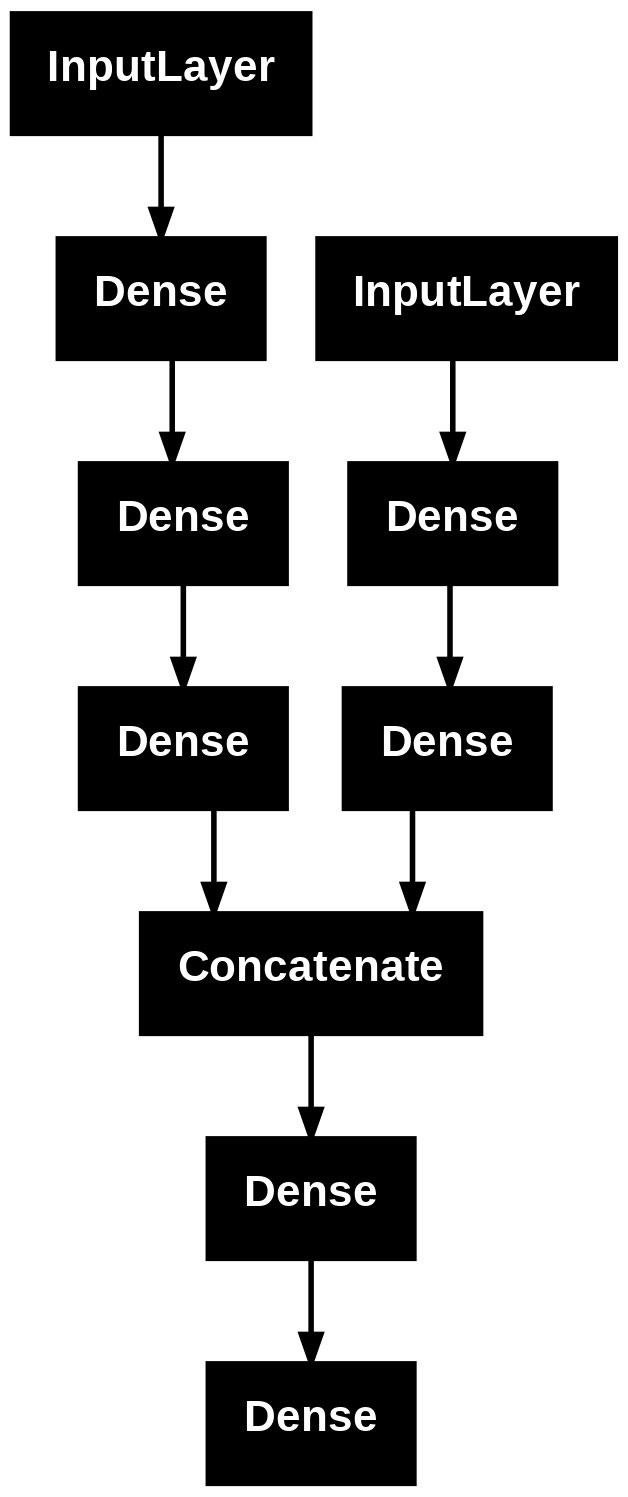

In [ ]:
from keras.utils import plot_model
plot_model(model)

# Real World Example



In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jangedoo/utkface-new")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'utkface-new' dataset.
Path to dataset files: /kaggle/input/utkface-new


In [54]:
folder_path = '/kaggle/input/utkface-new/UTKFace'
folder_path_2 = '/kaggle/input/utkface-new/crop_part1'
folder_path_3 = '/kaggle/input/utkface-new/utkface_aligned_cropped'

In [58]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:
age = []
gender = []
img_path = []
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)

In [60]:
len(age)

23708

In [61]:
df = pd.DataFrame({'age': age, 'gender':gender, 'img': img_path})

In [62]:
df.head()

age  gender                                    img
0   26       0  26_0_2_20170104023102422.jpg.chip.jpg
1   22       1  22_1_1_20170112233644761.jpg.chip.jpg
2   21       1  21_1_3_20170105003215901.jpg.chip.jpg
3   28       0  28_0_0_20170117180555824.jpg.chip.jpg
4   17       1  17_1_4_20170103222931966.jpg.chip.jpg

In [63]:
train_df = df.sample(frac=1, random_state=0).iloc[:20000]
test_df = df.sample(frac=1, random_state=0).iloc[20000:]

In [64]:
train_df.shape

(20000, 3)

In [65]:
test_df.shape

(3708, 3)

# Data Augmentation

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2,
    rotation_range = 20,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,

)

test_data_generator = ImageDataGenerator(rescale=1./255)

In [67]:
train_generator = train_data_generator.flow_from_dataframe(
    train_df,
    directory = folder_path,
    x_col ='img',
    y_col = ['age', 'gender'],
    target_size = (200,200),
    class_mode = 'multi_output'
)
test_generator = test_data_generator.flow_from_dataframe(
    test_df,
    directory = folder_path,
    x_col ='img',
    y_col = ['age', 'gender'],
    target_size = (200,200),
    class_mode = 'multi_output'
)

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [68]:
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model

In [69]:
vggnet = VGG16(
    include_top=False,
    input_shape=(200,200,3)
)

In [70]:
vggnet.trainable = False

output = vggnet.layers[-1].output

flatten = Flatten()(output)
dense_1 = Dense(512, activation='relu')(flatten)
dense_2 = Dense(512, activation='relu')(flatten)

dense_3 = Dense(512, activation='relu')(dense_1)
dense_4 = Dense(512, activation='relu')(dense_2)
output_1 = Dense(1, activation='linear', name = 'age')(dense_3)
output_2 = Dense(1, activation='sigmoid', name = 'gender')(dense_4)

In [71]:
model = Model(inputs = vggnet.input, outputs = (output_1, output_2))

In [72]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 200, 200,  │      1,792 │ input_layer_3[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 200, 200,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 100, 100,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 100, 100,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 100, 100,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 50, 50,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 50, 50,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 50, 50,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 50, 50,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 25, 25,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 25, 25,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 25, 25,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 25, 25,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 12, 12,    │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 12, 12,    │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 12, 12,    │  2,359,808 │ block5_conv1[0][

 Total params: 34,116,418 (130.14 MB)

 Trainable params: 19,401,730 (74.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

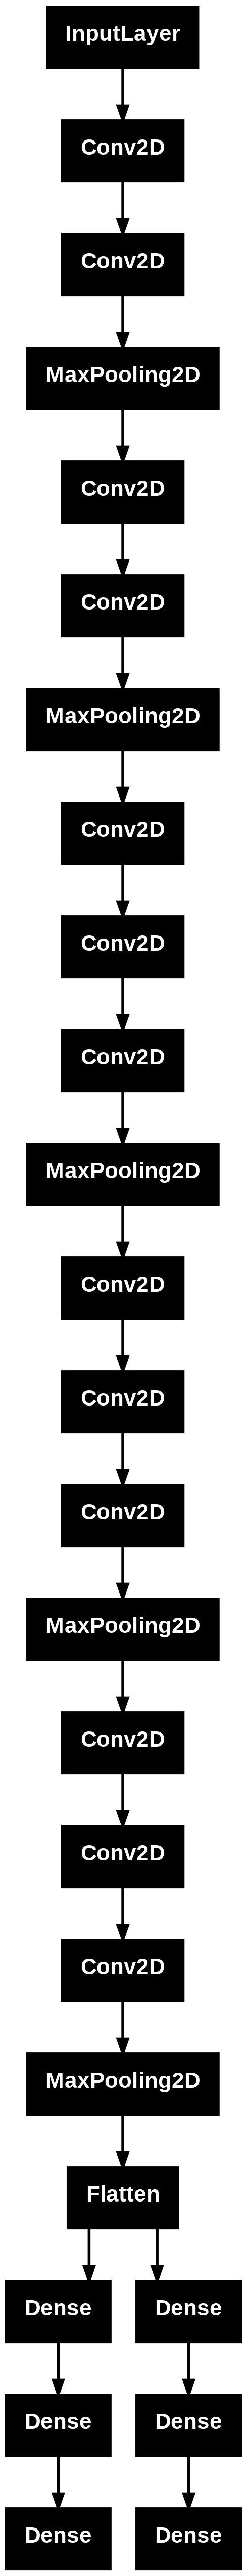

In [73]:
from keras.utils import plot_model
plot_model(model)

In [74]:
model.compile(optimizer='adam', loss={'age': 'mae', 'gender': 'binary_crossentropy'}, metrics={'age': 'mae', 'gender': 'accuracy'})

In [ ]:
model.fit(train_generator, batch_size=32, epochs = 10, validation_data=test_generator)